In [122]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


# Exploring Mental Health In The Tech Industry In 2016
# Made By Sinem Faide Altun


*Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.* [Seaborn](https://seaborn.pydata.org/)

Before starting the coding process of the project, I knew that I wanted to use a lot of visualization for outcomes from my data. Seaborn library seemed like the perfect opportunity to get familiar with various of graphs. I created a bar plot, heat map, histogram, violen plot, pie charts and factor plots in order to visualize my data. Using seaborn library was definitly one of the highlights of my project.

In [123]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)

The data I am working with is a survey on mental health in the Tech industry, created in 2016. It is a pretty big data that contains different kind of questions related to mental health. After downloading the dataset from the source I uploaded it into my jupyter notebook to use it directly. Below, is the data with questions and answers. It is not a perfect data with blank spaces, yes-no or 1-0 answers and typos. Before I actually start analyzing it and creating outcomes I need to clean the data and make it workable.

In [124]:
data = pd.read_csv('./mental-heath-in-tech-2016_20161114.csv')
data

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [125]:
survey = list(data.columns)
survey

['Are you self-employed?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'Do you think that discussing a mental health disorder with your employer would have neg

## Data and Preprocessing (cleaning, missing values, recoding)

In order to explain my preprocessing steps, I split the code below to 4 parts and will go through them briefly.

1: The column names aka the questions asked in the survey need to be organized. Some of them are too long and it is hard to type them everytime there is work to do. So I rename them in a way that would make sense, with key words. To summarize, I am arranging the headings.
****************

2: I am arranging column values for critical key columns such as **Tech role flag** or **Tech company flags** are changed to 'Yes' 'No' 'N/A' instead of 1,0,NaN.
************

3: Arranging the gender column. My main idea here is to create 3 categories for sex: Male, Female and Others. I look through the whole column and add them to the related category. I do not claim that transgender people do not belong in the gender that they chose, my purpose is to later on examine people who are knowledged about their gender and their relation with mental health compared to those who are directly identified as male or female. That is why I created an 'Others' category. 

This section is interesting because it allowed me to learn new terms and get educated.
*************

4: Recoding Comp size & country columns for ease when doing plots later on.
**********

5: The maximum age is 323, minimum age is 3. There are only 5 people that have weird ages (3yo, 15yo, or 99yo or 323 yo). Clearly this is an error so people with strange ages will take the average age of the dataset (the correct calculated one, without outliers).

In [126]:

# ----------- CLEANING THE DATA -----------

#1
renamed_columns = ['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                  'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                  'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork',
                  'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2', 'mh_online_res_flag',
                  'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
                  'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
                  'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
                  'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers',
                  'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork',
                  'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
                  'mh_disorder_past', 'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                  'yes:condition_diagnosed', 'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
                  'age', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position', 'remote_flag']
data.columns = renamed_columns

#2
data['mh_sought_proffes_treatm'].replace(to_replace = [0], value = 'No', inplace = True)
data['mh_sought_proffes_treatm'].replace(to_replace = [1], value = 'Yes', inplace = True)

data['tech_role_flag'].replace(to_replace = [0], value = 'No', inplace = True)
data['tech_role_flag'].replace(to_replace = [1], value = 'Yes', inplace = True)

data['tech_comp_flag'].replace(to_replace = [0], value = 'No', inplace = True)
data['tech_comp_flag'].replace(to_replace = [1], value = 'Yes', inplace = True)


#3
data['sex'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'male ','Cis Male','cisdude', 'cis man', 'MALE'], value = 'Male', inplace = True)

data['sex'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ',
       'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman','AFAB'], value = 'Female', inplace = True)

data['sex'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman','female-bodied; no feelings about gender','male 9:1 female, roughly',
        'Male/genderqueer','Male (trans, FtM)','Transitioned, M2F','Genderfluid (born female)'], value = 'Others', inplace = True)

#4
data['comp_no_empl'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)
data['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
data['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
data['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
data['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

#5
mean_age1 = data[(data['age'] >= 18) | (data['age'] <= 75)]['age'].mean()
mean_age = math.floor(mean_age1)
data['age'].replace(to_replace = data[(data['age'] < 18) | (data['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)

In [127]:
data.head(2)

,self_empl_flag,comp_no_empl,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,mh_coverage_flag2,mh_online_res_flag,mh_diagnosed&reveal_clients_flag,mh_diagnosed&reveal_clients_impact,mh_diagnosed&reveal_cowork_flag,mh_cowork_reveal_neg_impact,mh_prod_impact,mh_prod_impact_perc,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,why/why_not,future_mh_specification,why/why_not2,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_for_others_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,yes:what_diagnosis?,maybe:whats_your_diag,mh_diagnos_proffesional,yes:condition_diagnosed,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,live_us_teritory,country_work,work_us_teritory,work_position,remote_flag
0,0,26-100,Yes,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia, etc)",No,Not applicable to me,Not applicable to me,39,Male,UK,NaN,UK,NaN,Back-end Developer,Sometimes
1,0,6-25,Yes,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,"It would depend on the health issue. If there is a health issue that would not immediately affect my job performance, such as diabetes, I would not bring it up during the interview. If it was something more severe, such as narcolepsy, I might bring it up depending on how controlled it was.",No,"While mental health has become a more prominent issue recently, I feel like there is still a lot of stigma surrounding it. At this point, with our culture, I would not bring it up. I hope that within the next 20-30 years that stigma will be gone and it can be brought up safely in an interview.","No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)",Yes,Rarely,Sometimes,29,Male,USA,Illinois,USA,Illinois,Back-end Developer|Front-end Developer,Never


Printing the heading(column name) and its corresponse question so that we can make the analysis better and easier.

In [128]:
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

headings = pd.DataFrame(
    {
     'column': renamed_columns,
     'questions': survey
    })
left_aligned_df = headings.style.set_properties(**{'text-align': 'left'})
display(left_aligned_df)

,column,questions
0,self_empl_flag,Are you self-employed?
1,comp_no_empl,How many employees does your company or organization have?
2,tech_comp_flag,Is your employer primarily a tech company/organization?
3,tech_role_flag,Is your primary role within your company related to tech/IT?
4,mh_coverage_flag,Does your employer provide mental health benefits as part of healthcare coverage?
5,mh_coverage_awareness_flag,Do you know the options for mental health care available under your employer-provided coverage?
6,mh_employer_discussion,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
7,mh_resources_provided,Does your employer offer resources to learn more about mental health concerns and options for seeking help?
8,mh_anonimity_flag,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
9,mh_medical_leave,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"


I mentioned that there are empty spaces in the data. Lets check these Null values, **.isnull()** helps me do that.

After I take sum of the null values for each column I pick the ones whose sum are not 0, that means there are null values. I create a bar plot with the seaborn library. Looking at the graph we can see how many null values each column have.

Reference for the code:
> https://www.kaggle.com/code/ananyaroy1011/mental-health-insights In:[6]


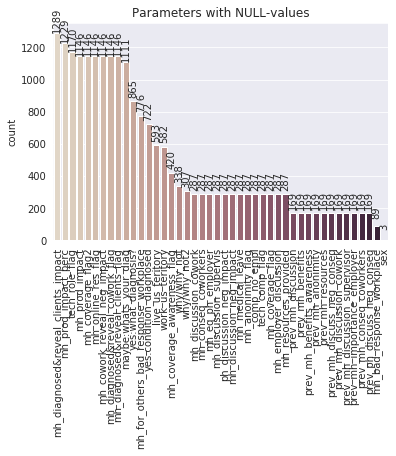

In [129]:
sns.set_style(style="darkgrid")
sns.set_palette(palette = 'pastel')
null_values = data.isnull().sum().sort_values(ascending=False).to_frame()
null_values = null_values.loc[null_values[0] != 0]
ax = sns.barplot(x=null_values.index, y=null_values[0], data=null_values.astype(int),  palette="ch:.25")
ax.tick_params(axis='x', rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+20), 
                   ha = 'center', va = 'center', rotation=90,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
ax = ax.set(ylabel="count", title='Parameters with NULL-values')

Now I visualize the missing, null values on the heat map.

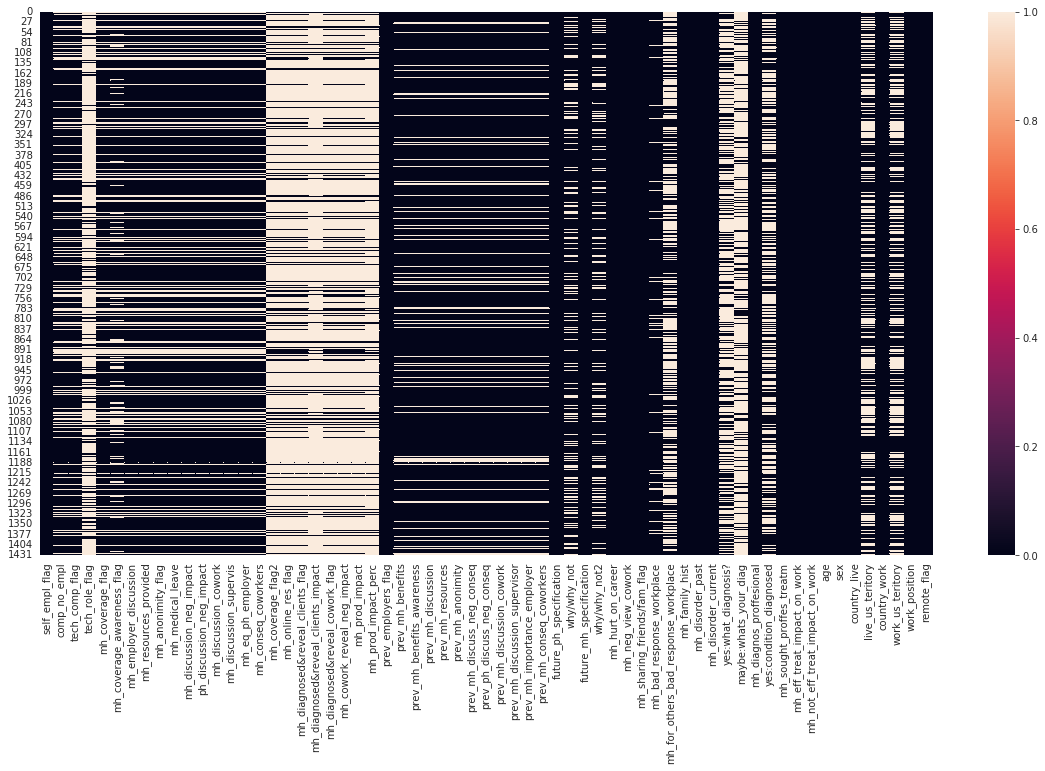

In [130]:
# ----------- MISSING VALUES -----------
plt.figure(figsize = (20,10))
sns.heatmap(data = data.isna());

Below, I am filling NA/NaN values as string 'N/A', not applicable in place.

I am doing this process for only 2 columns, because the information of a person's role in the tech and whether or not they are working in tech are the keys for my analysis. So only 2 columns are enough.



In [131]:
data.tech_role_flag.fillna('N/A', inplace=True)
data.tech_comp_flag.fillna('N/A', inplace=True)
data

,self_empl_flag,comp_no_empl,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,mh_coverage_flag2,mh_online_res_flag,mh_diagnosed&reveal_clients_flag,mh_diagnosed&reveal_clients_impact,mh_diagnosed&reveal_cowork_flag,mh_cowork_reveal_neg_impact,mh_prod_impact,mh_prod_impact_perc,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,why/why_not,future_mh_specification,why/why_not2,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_for_others_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,yes:what_diagnosis?,maybe:whats_your_diag,mh_diagnos_proffesional,yes:condition_diagnosed,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,live_us_teritory,country_work,work_us_teritory,work_position,remote_flag
0,0,26-100,Yes,N/A,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia, etc)",No,Not applicable to me,Not applicable to me,39,Male,UK,NaN,UK,NaN,Back-end Developer,Sometimes
1,0,6-25,Yes,N/A,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,"It would depend on the health issue. If there is a health issue that would not immediately affect my job performance, such as diabetes, I would not bring it up during the interview. If it was something more severe, such as narcolepsy, I might bring it up depending on how controlled it was.",No,"While mental health has become a more prominent issue recently, I feel like there is still a lot of stigma surrounding it. At this point, with our culture, I would not bring it up. I hope that within the next 20-30 years that stigma will be gone and it can be brought up safely in an interview.","No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)",Yes,Rarely,Sometimes,29,Male,USA,Illinois,USA,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,Yes,N/A,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if I can do my job or not.",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,No,Maybe,No,NaN,NaN,No,NaN,Yes,Not applicable to me,Not applicable to me,38,Male,UK,NaN,UK,NaN,Back-end Developer,Always
3,1,NaN,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"Yes, I know several","Sometimes, if it comes up",I'm not sure,"Sometimes, if it comes up",I'm not sure,Yes,1-25%,1,Some did,N/A (not currently aware

Checking Gender Data in order to group the several versions of each gender in a correct way

In [132]:
gender_values = data.sex.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'sex': 'count'})
table_gender = gender_values.style.background_gradient(cmap=cmap)
table_gender

,count
Male,1057
Female,340
Others,33


Computing the q-th percentile of the data to create an age histogram.


According to the calculations in the for loop, q1 tells us that a person who is 21 (q1=21) is older than %1; q3 tells us that a person who is 57 (q3=57) is older than %99 of the population in the data. Those who are older than 57 or younger than 21  are identified as outliers and then extracted.

Looking at the histogram, I can see how many people there are for each age. This shows me the age demographic for the survey

The reference for the histogram code:
> https://www.kaggle.com/code/ananyaroy1011/mental-health-insights In:[10]

In [133]:
from sklearn.ensemble import IsolationForest


def winsorization_outliers(df):
    out=[]
    for i in df:
        q1 = np.percentile(df , 1) 
        q3 = np.percentile(df , 99) 
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
    return out
    
outliers = winsorization_outliers(data.age)

Outliers: [19, 20, 63, 61, 61, 20, 19, 62, 58, 66, 59, 19, 63, 19, 20, 59, 65, 63, 20, 74, 70, 63, 20, 20]


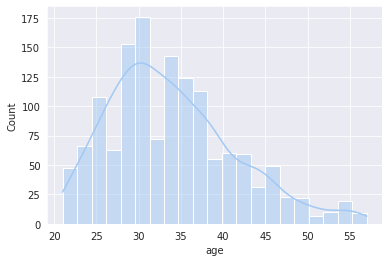

In [134]:
data_age = data.loc[~data.age.isin(outliers)]
sns.histplot(data=data_age, x="age",kde=True);

Continuing on, I extract people from the age column whose values/answers are missing in the categories of:

+ Has your employer ever formally discussed mental health 
+ Sex

The cleaned version of the data will be useful when creating a violin plot.

In [135]:
data_age=data_age.query(" not (mh_employer_discussion != mh_employer_discussion) and not (sex != sex)")
data_age

,self_empl_flag,comp_no_empl,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,mh_coverage_flag2,mh_online_res_flag,mh_diagnosed&reveal_clients_flag,mh_diagnosed&reveal_clients_impact,mh_diagnosed&reveal_cowork_flag,mh_cowork_reveal_neg_impact,mh_prod_impact,mh_prod_impact_perc,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,why/why_not,future_mh_specification,why/why_not2,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_for_others_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,yes:what_diagnosis?,maybe:whats_your_diag,mh_diagnos_proffesional,yes:condition_diagnosed,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,live_us_teritory,country_work,work_us_teritory,work_position,remote_flag
0,0,26-100,Yes,N/A,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia, etc)",No,Not applicable to me,Not applicable to me,39,Male,UK,NaN,UK,NaN,Back-end Developer,Sometimes
1,0,6-25,Yes,N/A,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,"It would depend on the health issue. If there is a health issue that would not immediately affect my job performance, such as diabetes, I would not bring it up during the interview. If it was something more severe, such as narcolepsy, I might bring it up depending on how controlled it was.",No,"While mental health has become a more prominent issue recently, I feel like there is still a lot of stigma surrounding it. At this point, with our culture, I would not bring it up. I hope that within the next 20-30 years that stigma will be gone and it can be brought up safely in an interview.","No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)",Yes,Rarely,Sometimes,29,Male,USA,Illinois,USA,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,Yes,N/A,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if I can do my job or not.",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,No,Maybe,No,NaN,NaN,No,NaN,Yes,Not applicable to me,Not applicable to me,38,Male,UK,NaN,UK,NaN,Back-end Developer,Always
4,0,6-25,No,Yes,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,I don't know,N/A (not currently aware),Some did,None did,I don't know,Some of them,Some of them,"N

## Analysis and Visuzalization of the Data

### Violin Plot

A violin plot shows how a data set varies along one variable by combining a boxplot with a PDF. The boxplot summarizes the center and spread: The white dot in the center of the box represents the median; the length of the box represents the interquartile range (IQR).

With the added density information, violin plot nicely reveals the structure in the data, while a boxplot does not. And this is why violin plot is better than boxplot, when you have enough data to estimate the density.

### "Treatment" Analysis From the Age-Gender Point

In both cases(yes-no), the median man age is higher than female;

In the yes to treatment category, the max men age is lower than women, and in the no to treatment category, the max women age is lower than men;

Women and others have more cases in treatment-yes category. 

Others have have great interest interest in treatment and the average age is low. They start early. Nearly all of them are looking for treatment. This is the part where creating an others category for sex paid off, those who are more questioning and aware of their gender are interested in getting help.

In [136]:
import plotly.express as px

fig = px.violin(data_age, y="age", x="mh_sought_proffes_treatm", color="sex", box=True, points="all")
fig.update_layout(
    title_text="Have you ever sought treatment for a mental health issue from a mental health professional?")
fig.show()



Below there is a pie chart which shows people who work in tech and their opinion on how willing they would be to share that they have a mental illness with friends/family. 

+ all_ represent the number of people working in the tech industry and answered the question.

+ na_ is the number of people working in the tech industry who do not find the question applicable.

+ not_open_ is the number of people working in the tech industry who are not open to share.

+ somewhat_no is the number of people working in the tech industry who are somewhat not open to share.

+ neutral_ is the number of people working in the tech industry who are neutral about sharing.

+ somewhat_o is the number of people working in the tech industry who are somewhat open to share.

+ very_o is the number of people working in the tech industry who are very open to share.

Percentages of each category of answers are shown in the pie chart.

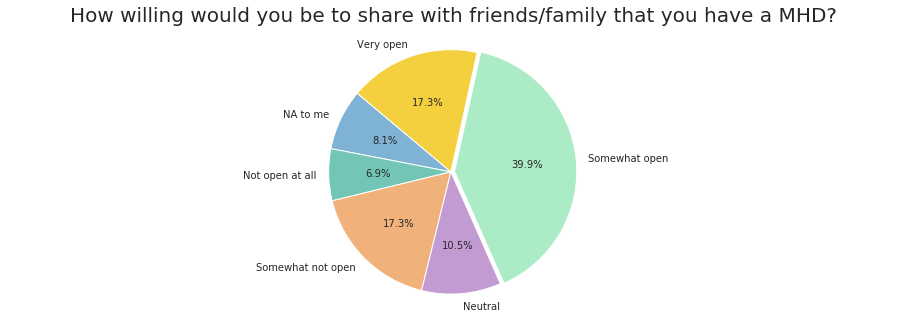

In [137]:

plt.figure(figsize = (16, 5))

# How willing would you be to share with friends and family that you have a mental illness?
all_ = data[data['tech_role_flag'] == 'Yes']['mh_sharing_friends/fam_flag'].count()
na_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_sharing_friends/fam_flag'] == "Not applicable to me (I do not have a mental illness)")]['mh_sharing_friends/fam_flag'].count()
not_open_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_sharing_friends/fam_flag'] == 'Not open at all')]['mh_sharing_friends/fam_flag'].count()
somewhat_no = data[(data['tech_role_flag'] == 'Yes') & (data['mh_sharing_friends/fam_flag'] == 'Somewhat not open')]['mh_sharing_friends/fam_flag'].count()
neutral_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_sharing_friends/fam_flag'] == 'Neutral')]['mh_sharing_friends/fam_flag'].count()
somewhat_o = data[(data['tech_role_flag'] == 'Yes') & (data['mh_sharing_friends/fam_flag'] == 'Somewhat open')]['mh_sharing_friends/fam_flag'].count()
very_o = data[(data['tech_role_flag'] == 'Yes') & (data['mh_sharing_friends/fam_flag'] == 'Very open')]['mh_sharing_friends/fam_flag'].count()

labels = 'NA to me', 'Not open at all', 'Somewhat not open', 'Neutral', 'Somewhat open', 'Very open'
sizes = [na_/all_, not_open_/all_, somewhat_no/all_, neutral_/all_, somewhat_o/all_, very_o/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
explode = (0, 0, 0, 0, 0.03, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('How willing would you be to share with friends/family that you have a MHD?', pad = 14, fontsize = 20);

Below, there are 4 bar plots, lets inspect them individually.

**Plot 1:** treatment values is pandas data frame that shows how many people said yes/no to the question "Have you ever sought treatment for a mental health issue from a mental health professional?". family history values is also a pandas data frame that shows number of answers to "Do you have a family history of mental illness?" for each category: yes, no and I don't know.

Then we see the bar plot visualizing these values, it can be examined that the number of people who have sought treatment are very high and majority of people have a family history of mental illness.

**Plot 2:** Continuing with our examination from plot 1, majority of people who have a family family history of mental illness do actually sought treatment from a proffesional regarding mental health. Opposite of that, people who DO NOT have a family history of mental illness are more likely to not request treatment. This is not a very surprising conclusion as education and awareness starts firstly within our families.

**Plot 3:** Examining the relation with soughting treatment and viewing of mental health issues. Majority of people who HAVE sought treatment answer the question "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?"as sometimes. There are only a few people who believe that mental health issues never interfere with their work when treated effectively. On the other side, of course people who have not sought treatment mostly view this question as not applicable.

This is an interesting plot because it shows there is a big group of people thinking that the treatment of mental health issues sometimes gets in the way of their work.

**Plot 4:** People who have a family history with mental health also believe that sometimes the treatment interfere with their work. 

Reference for the code:

> https://www.kaggle.com/code/ananyaroy1011/mental-health-insights In:[7]

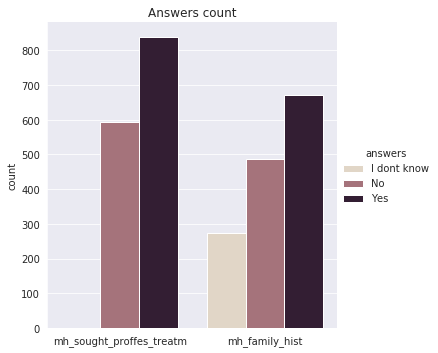

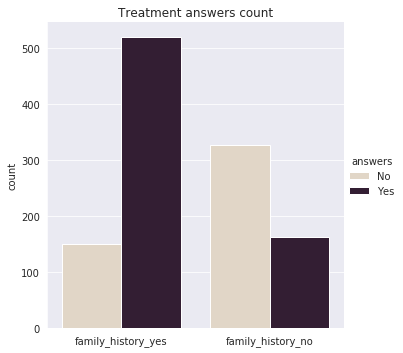

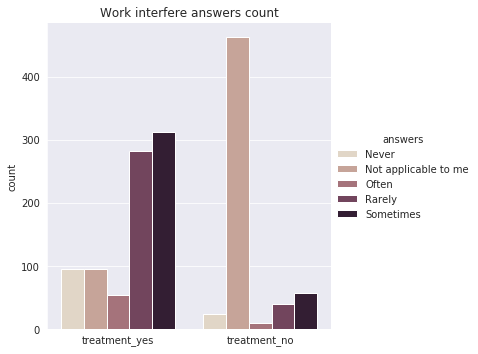

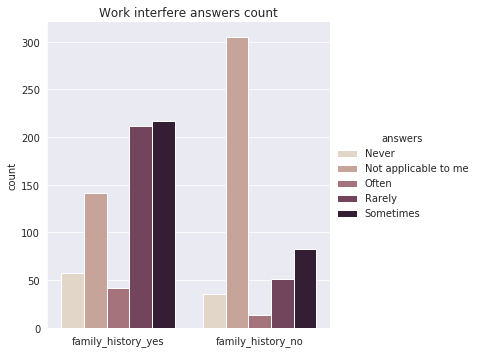

In [138]:

treatment_values = data.mh_sought_proffes_treatm.value_counts().to_frame()
family_history_values = data.mh_family_hist.value_counts().to_frame()
plot_frame = pd.DataFrame({'answers': ['I don''t know','No','Yes'], 'mh_sought_proffes_treatm': treatment_values['mh_sought_proffes_treatm'], 'mh_family_hist': family_history_values['mh_family_hist']})
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="mh_sought_proffes_treatm", value_name="mh_family_hist")
sns.factorplot(x='mh_sought_proffes_treatm', y='mh_family_hist', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Answers count')

treatment_values_yes = data.mh_sought_proffes_treatm.loc[data.mh_family_hist == 'Yes'].value_counts().to_frame()
treatment_values_no = data.mh_sought_proffes_treatm.loc[data.mh_family_hist == 'No'].value_counts().to_frame()
plot_frame = pd.DataFrame({'family_history_yes': treatment_values_yes['mh_sought_proffes_treatm'], 'family_history_no': treatment_values_no['mh_sought_proffes_treatm']})
plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="family_history_yes", value_name="family_history_no")
sns.factorplot(x='family_history_yes', y='family_history_no', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Treatment answers count')


work_interfere_yes = data.mh_eff_treat_impact_on_work.loc[data.mh_sought_proffes_treatm == 'Yes'].value_counts().to_frame()
work_interfere_no = data.mh_eff_treat_impact_on_work.loc[data.mh_sought_proffes_treatm == 'No'].value_counts().to_frame()
plot_frame = pd.DataFrame({'treatment_yes': work_interfere_yes['mh_eff_treat_impact_on_work'], 'treatment_no': work_interfere_no['mh_eff_treat_impact_on_work']})
plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="treatment_yes", value_name="treatment_no")
sns.factorplot(x='treatment_yes', y='treatment_no', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Work interfere answers count')


work_interfere_yes = data.mh_eff_treat_impact_on_work.loc[data.mh_family_hist == 'Yes'].value_counts().to_frame()
work_interfere_no = data.mh_eff_treat_impact_on_work.loc[data.mh_family_hist == 'No'].value_counts().to_frame()
plot_frame = pd.DataFrame({'family_history_yes': work_interfere_yes['mh_eff_treat_impact_on_work'], 'family_history_no': work_interfere_no['mh_eff_treat_impact_on_work']})
plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="family_history_yes", value_name="family_history_no")
sns.factorplot(x='family_history_yes', y='family_history_no', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Work interfere answers count')


When creating the histogram of age, we extracted outliers, here I examine their condition and create a factor plot that shows how many people have sought treatment for a mental health issue from a mental health professional according to genders.

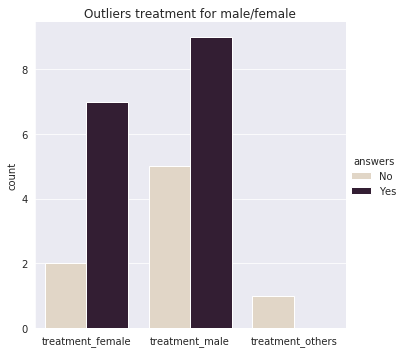

In [139]:
data_outliers = data.loc[data.age.isin(outliers)]

treatment_female = data_outliers.mh_sought_proffes_treatm.loc[data_outliers.sex == 'Female'].value_counts().to_frame()
treatment_male = data_outliers.mh_sought_proffes_treatm.loc[data_outliers.sex == 'Male'].value_counts().to_frame()
treatment_others = data_outliers.mh_sought_proffes_treatm.loc[data_outliers.sex == 'Others'].value_counts().to_frame()

plot_frame = pd.DataFrame({'treatment_female': treatment_female['mh_sought_proffes_treatm'], 'treatment_male': treatment_male['mh_sought_proffes_treatm'], 'treatment_others': treatment_others['mh_sought_proffes_treatm']})

plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="treatment_female", value_name="treatment_male")
sns.factorplot(x='treatment_female', y='treatment_male', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Outliers treatment for male/female')

### Gender (only techs)

In this part I focus on people who work in tech.

The pie chart shows that as expected, most of the respondents are male, the reason for that is because the tech industry is occupied by a big majority of men. The others category is a minority.

The bar plot shows the relation with gender and countries. In the survey, USA has the highest number of people working in tech and majority of them are male.

<Figure size 1440x720 with 0 Axes>

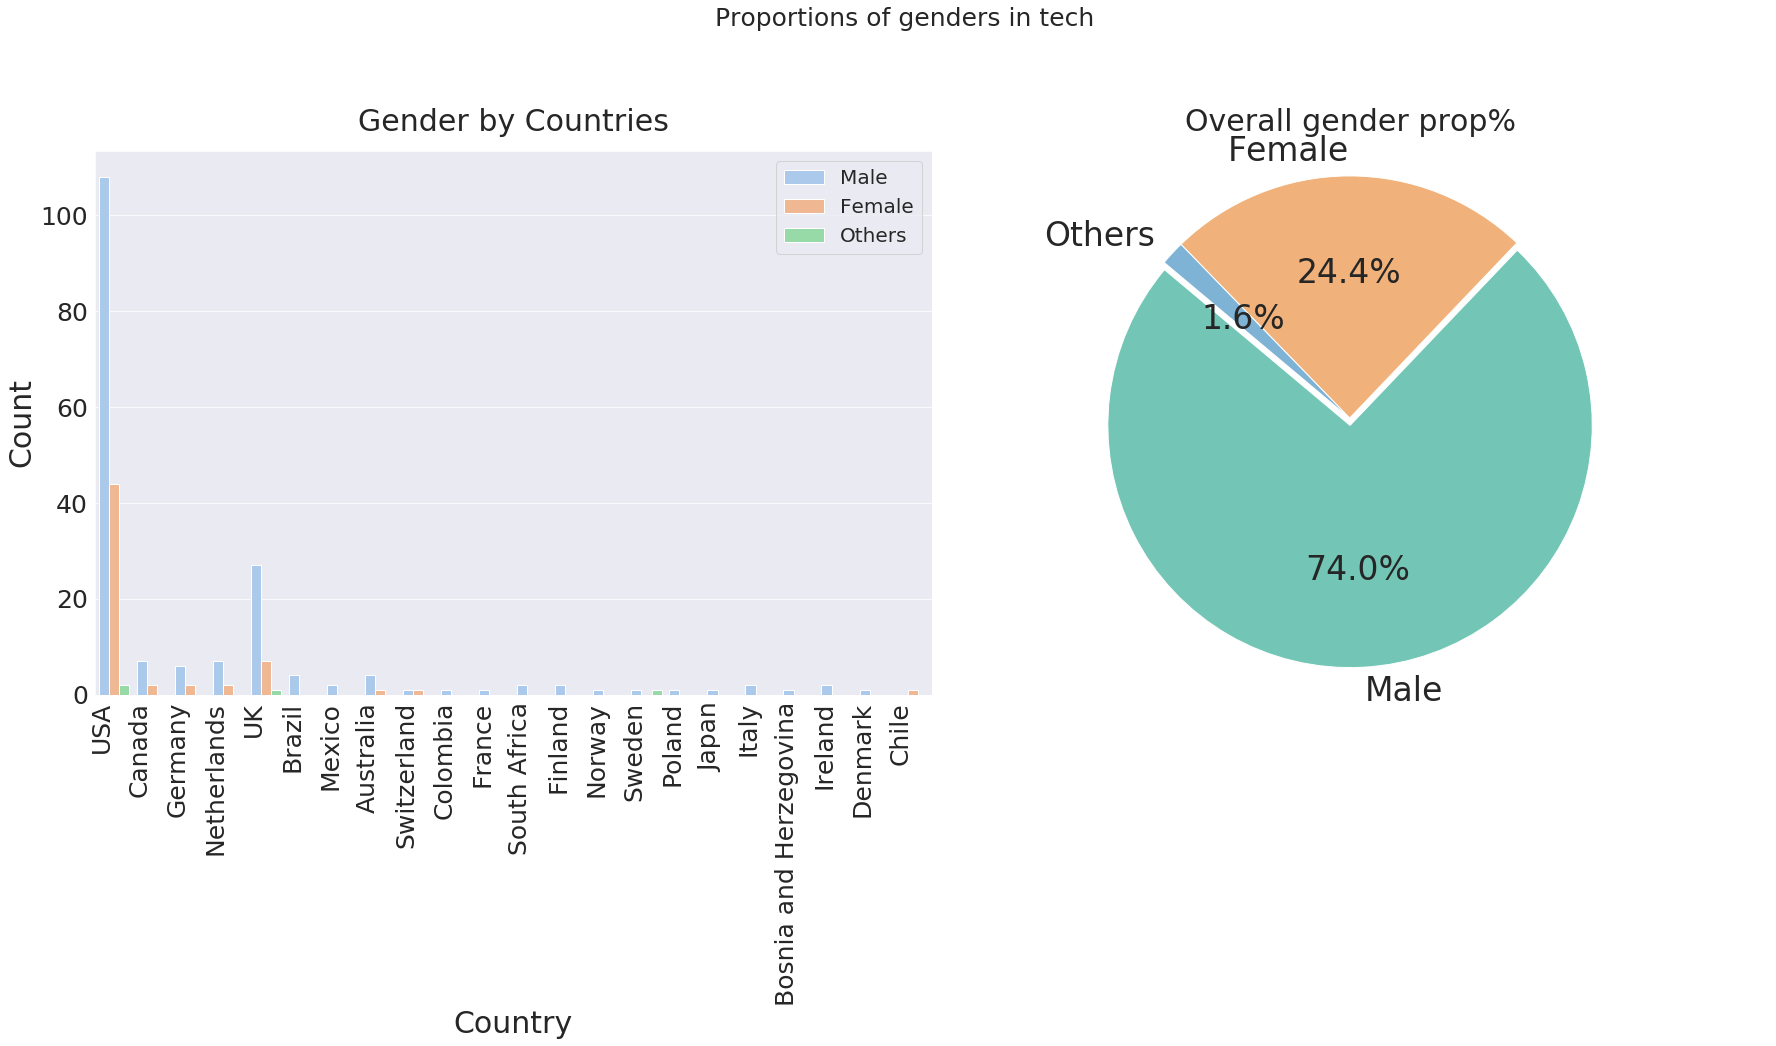

In [140]:
plt.figure(figsize = (20,10))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(30)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Proportions of genders in tech', fontsize = 25, y=1.08)

# Pie Chart
all_techs = data[data['tech_role_flag'] == 'Yes']['sex'].count()
males = data[(data['tech_role_flag'] == 'Yes') & (data['sex'] == 'Male')]['sex'].count()
females = data[(data['tech_role_flag'] == 'Yes') & (data['sex'] == 'Female')]['sex'].count()
other = data[(data['tech_role_flag'] == 'Yes') & (data['sex'] == 'Others')]['sex'].count()

labels = 'Male', 'Female', 'Others'
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 33})
ax2.axis('equal')
ax2.set_title('Overall gender prop%', pad = 20, fontsize = 30)

# Barchart
sns.countplot(x = data[data['tech_role_flag'] == 'Yes']['country_live'], hue = data['sex'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('Gender by Countries', pad = 20, fontsize = 30)
ax1.set_xlabel('Country', fontsize = 30)
ax1.set_ylabel('Count', fontsize = 30)
ax1.tick_params(labelsize=25,axis='x', labelrotation = 90)
ax1.tick_params(labelsize=25, axis='y')
ax1.legend(['Male', 'Female', 'Others'],loc=1, prop={'size': 20});

### Insights from Techs
Have / Had Mental Health Disorder

The main analysis from the data is that **majority,%39.1 of people working in tech currently have a mental health disorder**. %38.3 of people do not, which is also not a small number but considering that %22.6 of people are unsure it is still very concerning. There is definitely a necessity to more support and guidance to identifying and addressing any issue that raised that "maybe" response in the first place


<Figure size 1440x720 with 0 Axes>

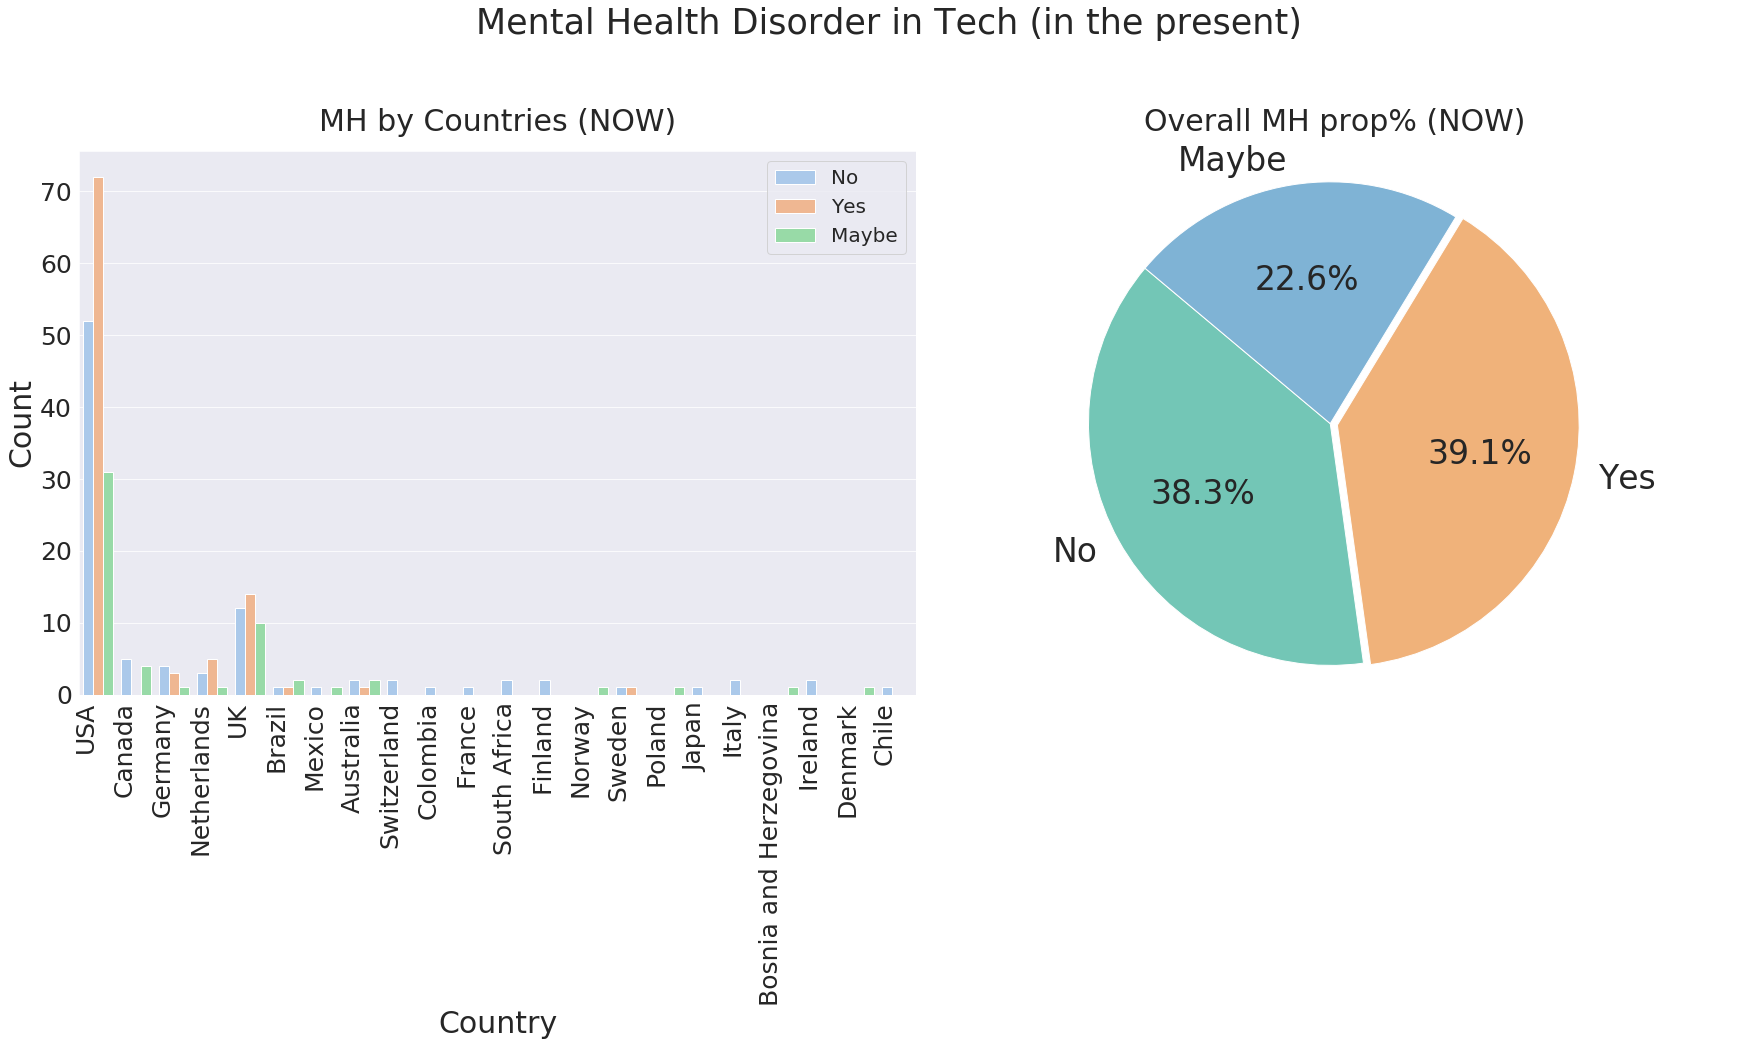

In [141]:
plt.figure(figsize = (20,10))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(30)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Mental Health Disorder in Tech (in the present)', fontsize = 35, y=1.08)

# Pie Chart (Now)
all_techs_now = data[data['tech_role_flag'] == 'Yes']['mh_disorder_current'].count()
no_now = data[(data['tech_role_flag'] == 'Yes') & (data['mh_disorder_current'] == 'No')]['mh_disorder_current'].count()
yes_now = data[(data['tech_role_flag'] == 'Yes') & (data['mh_disorder_current'] == 'Yes')]['mh_disorder_current'].count()
maybe_now = data[(data['tech_role_flag'] == 'Yes') & (data['mh_disorder_current'] == 'Maybe')]['mh_disorder_current'].count()

labels = 'No', 'Yes', 'Maybe'
sizes = [no_now/all_techs_now, yes_now/all_techs_now, maybe_now/all_techs_now]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0, 0.03, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 33})
ax2.axis('equal')
ax2.set_title('Overall MH prop% (NOW)', pad = 20, fontsize = 30)

# Barchart (now)
sns.countplot(x = data[data['tech_role_flag'] == 'Yes']['country_live'], hue = data['mh_disorder_current'], data=data, ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('MH by Countries (NOW)', pad = 20, fontsize = 30)
ax1.set_xlabel('Country', fontsize = 30)
ax1.set_ylabel('Count', fontsize = 30)
ax1.tick_params(axis='x', labelrotation = 90)
ax1.tick_params(labelsize=25, axis='x', labelrotation = 90)
ax1.tick_params(labelsize=25, axis='y')
ax1.legend(loc=1, prop={'size': 20});

The section shows that more than half of the respondents said that they had a mental health disorder in the past. This brings a little hope because with the modern view of mental health issues and places to get help increasing every day, it is possible to get better.

<Figure size 1440x720 with 0 Axes>

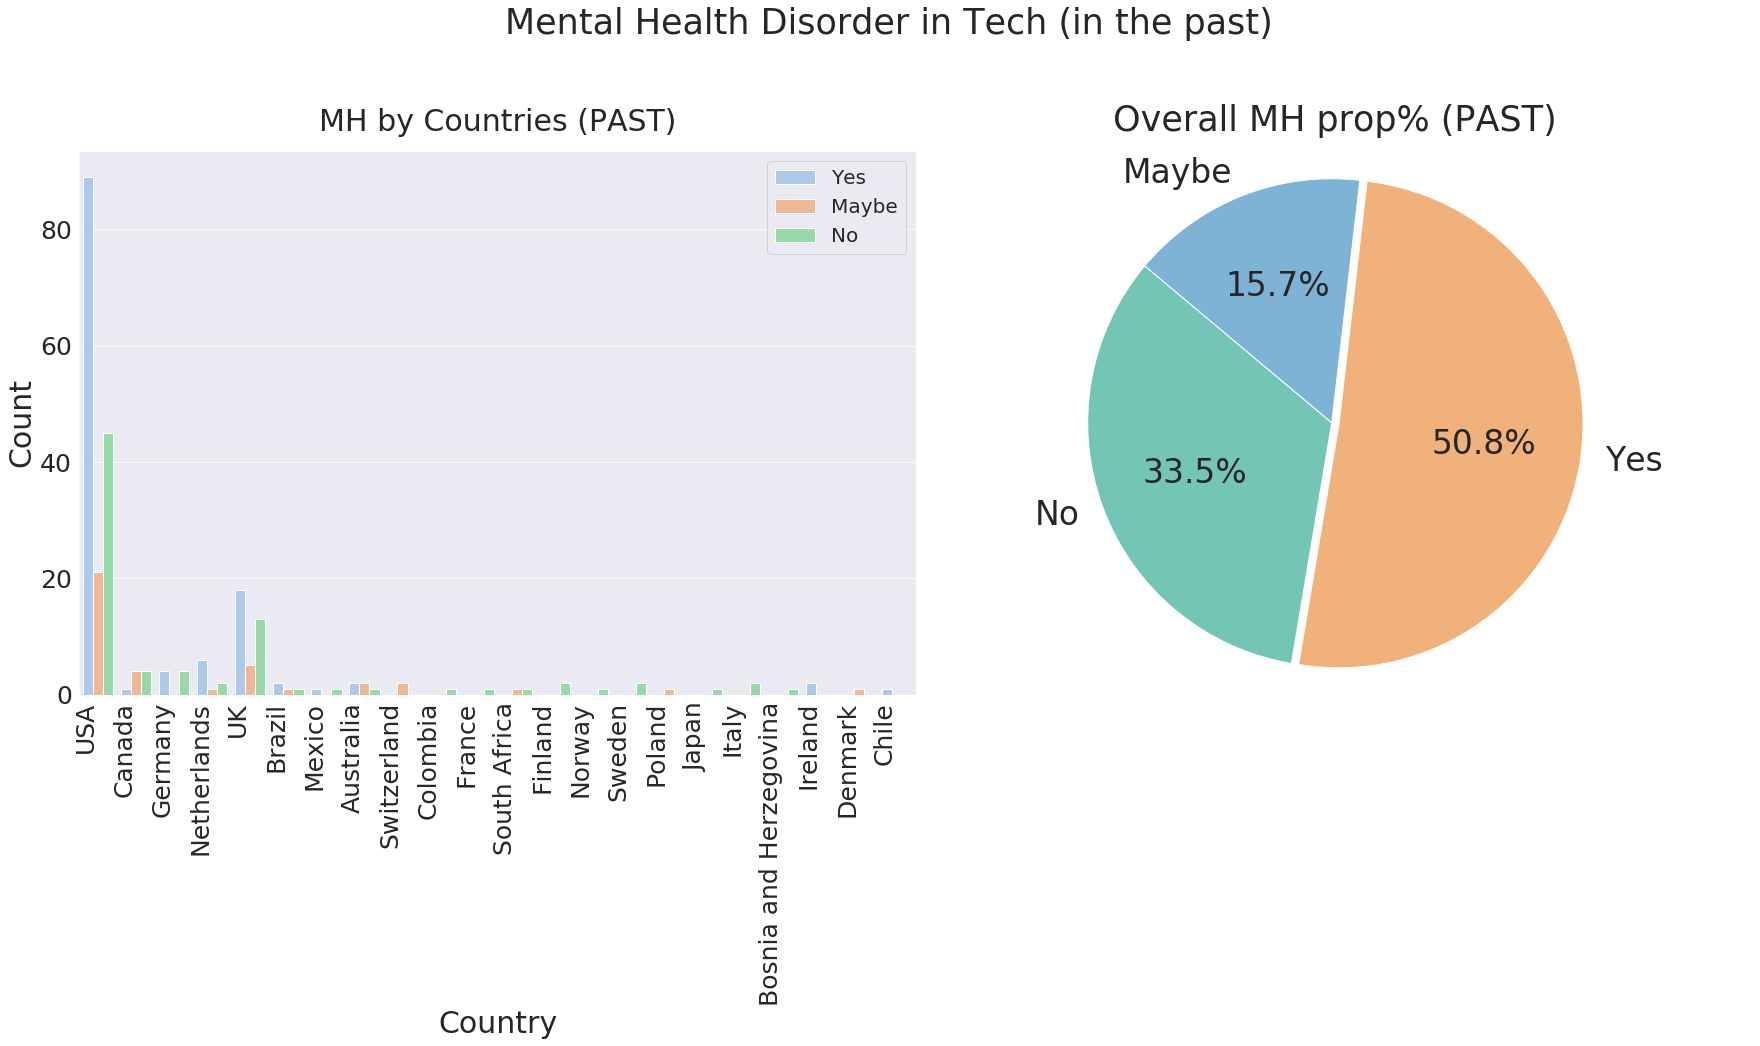

In [142]:
plt.figure(figsize = (20,10))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(30)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Mental Health Disorder in Tech (in the past)', fontsize = 35, y=1.08)

# Pie Chart (Now)
all_techs_past = data[data['tech_role_flag'] == 'Yes']['mh_disorder_past'].count()
no_past = data[(data['tech_role_flag'] == 'Yes') & (data['mh_disorder_past'] == 'No')]['mh_disorder_past'].count()
yes_past = data[(data['tech_role_flag'] == 'Yes') & (data['mh_disorder_past'] == 'Yes')]['mh_disorder_past'].count()
maybe_past = data[(data['tech_role_flag'] == 'Yes') & (data['mh_disorder_past'] == 'Maybe')]['mh_disorder_past'].count()

labels = 'No', 'Yes', 'Maybe'
sizes = [no_past/all_techs_past, yes_past/all_techs_past, maybe_past/all_techs_past]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0, 0.03, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 33})
ax2.axis('equal')
ax2.set_title('Overall MH prop% (PAST)', pad = 20, fontsize = 35)

# Barchart (now)
sns.countplot(x = data[data['tech_role_flag'] == 'Yes']['country_live'], hue = data['mh_disorder_past'], data=data, ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('MH by Countries (PAST)', pad = 20, fontsize = 30)
ax1.set_xlabel('Country', fontsize = 30)
ax1.set_ylabel('Count', fontsize = 30)
ax1.tick_params(labelsize=25, axis='x', labelrotation = 90)
ax1.tick_params(labelsize=25, axis='y')
ax1.legend(loc=1, prop={'size': 20});

The factor plot shows that Tech professionals are more interested in treatment than Non Tech professionals

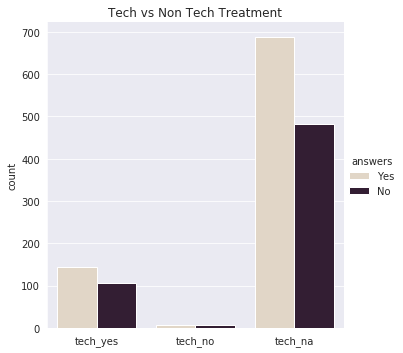

In [143]:

tech_yes = data.mh_sought_proffes_treatm.loc[data.tech_role_flag == 'Yes'].value_counts().to_frame()
tech_no = data.mh_sought_proffes_treatm.loc[data.tech_role_flag == 'No'].value_counts().to_frame()
tech_na = data.mh_sought_proffes_treatm.loc[data.tech_role_flag == 'N/A'].value_counts().to_frame()

plot_frame = pd.DataFrame({'tech_yes': tech_yes['mh_sought_proffes_treatm'], 'tech_no': tech_no['mh_sought_proffes_treatm'], 'tech_na': tech_na['mh_sought_proffes_treatm']})

plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="tech_yes", value_name="tech_no")
sns.factorplot(x='tech_yes', y='tech_no', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Tech vs Non Tech Treatment')

## Conclusion: Are companies taking Mental Health seriously?

From the averages in the survey, I would say yes, but not as much as it would be necessary. More than half of respondents have a Mental Health Coverage provided, but not the resorces of finding more information about this, meaning that most companies address mental health, but do not implicate themselves actively in it.

More than 70% of respondents do NOT know if their annonimity would be protected in the case of talking to a superior about their mental health problems, while half of them are not sure that the company would grant them a mental health medical leave.

Lastly, most respondents do not know if their company is taking mental health problems as serious as physical health. What is encouraging is that 94% of respondents do not think that there would be negative consequences for coworkers that experience mental health problems.

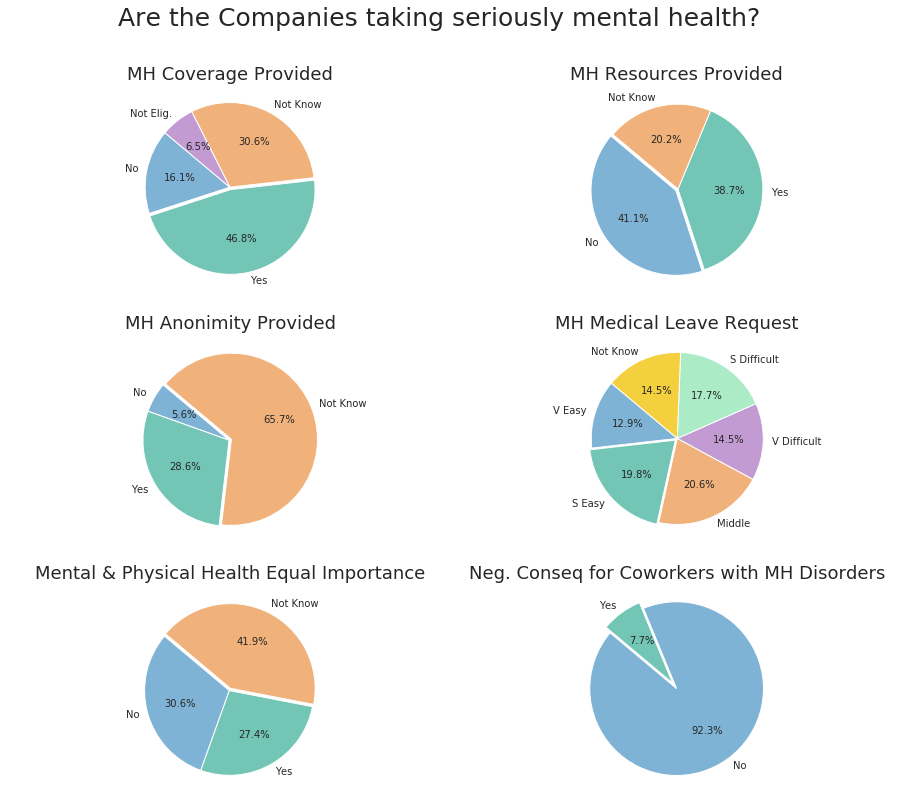

In [144]:

#mpl.rcParams['font.size'] = 13

fig, ax = plt.subplots(figsize = (16, 12), ncols=2, nrows=3)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('Are the Companies taking seriously mental health?', fontsize = 25, y = 1)

# Does your employer provide mental health benefits as part of healthcare coverage?
all_ = data[data['tech_role_flag'] == 'Yes']['mh_coverage_flag'].count()
no_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_coverage_flag'] == 'No')]['mh_coverage_flag'].count()
yes_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_coverage_flag'] == 'Yes')]['mh_coverage_flag'].count()
not_know_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_coverage_flag'] == "I don't know")]['mh_coverage_flag'].count()
not_elig_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_coverage_flag'] == 'Not eligible for coverage / N/A')]['mh_coverage_flag'].count()

labels = 'No', 'Yes', 'Not Know', 'Not Elig.'
sizes = [no_/all_, yes_/all_, not_know_/all_, not_elig_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3']
explode = (0, 0.03, 0, 0)  # explode 1st slice

ax[0][0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][0].axis('equal')
ax[0][0].set_title('MH Coverage Provided', pad = 14, fontsize = 18)

# Does your employer offer resources to learn more about mental health concerns and options for seeking help?
all_ = data[data['tech_role_flag'] == 'Yes']['mh_resources_provided'].count()
no_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_resources_provided'] == 'No')]['mh_resources_provided'].count()
yes_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_resources_provided'] == 'Yes')]['mh_resources_provided'].count()
not_know_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_resources_provided'] == "I don't know")]['mh_resources_provided'].count()

labels = 'No', 'Yes', 'Not Know'
sizes = [no_/all_, yes_/all_, not_know_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0.03, 0, 0)  # explode 1st slice

ax[0][1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[0][1].axis('equal')
ax[0][1].set_title('MH Resources Provided', pad = 14, fontsize = 18)

# Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
all_ = data[data['tech_role_flag'] == 'Yes']['mh_anonimity_flag'].count()
no_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_anonimity_flag'] == 'No')]['mh_anonimity_flag'].count()
yes_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_anonimity_flag'] == 'Yes')]['mh_anonimity_flag'].count()
not_know_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_anonimity_flag'] == "I don't know")]['mh_anonimity_flag'].count()

labels = 'No', 'Yes', 'Not Know'
sizes = [no_/all_, yes_/all_, not_know_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0, 0, 0.03)  # explode 1st slice

ax[1][0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[1][0].axis('equal')
ax[1][0].set_title('MH Anonimity Provided', pad = 14, fontsize = 18)

# If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
all_ = data[data['tech_role_flag'] == 'Yes']['mh_medical_leave'].count()
veasy_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_medical_leave'] == 'Very easy')]['mh_medical_leave'].count()
seasy_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_medical_leave'] == 'Somewhat easy')]['mh_medical_leave'].count()
middle_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_medical_leave'] == "Neither easy nor difficult")]['mh_medical_leave'].count()
vdiff_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_medical_leave'] == "Very difficult")]['mh_medical_leave'].count()
sdiff_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_medical_leave'] == "Somewhat difficult")]['mh_medical_leave'].count()
not_know_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_medical_leave'] == "I don't know")]['mh_medical_leave'].count()

labels = 'V Easy', 'S Easy', 'Middle', 'V Difficult', 'S Difficult', 'Not Know'
sizes = [veasy_/all_, seasy_/all_, middle_/all_, vdiff_/all_, sdiff_/all_, not_know_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
explode = (0, 0.03, 0, 0, 0, 0)  # explode 1st slice

ax[1][1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[1][1].axis('equal')
ax[1][1].set_title('MH Medical Leave Request', pad = 14, fontsize = 18)

# Do you feel that your employer takes mental health as seriously as physical health?
all_ = data[data['tech_role_flag'] == 'Yes']['mh_eq_ph_employer'].count()
no_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_eq_ph_employer'] == 'No')]['mh_eq_ph_employer'].count()
yes_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_eq_ph_employer'] == 'Yes')]['mh_eq_ph_employer'].count()
not_know_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_eq_ph_employer'] == "I don't know")]['mh_eq_ph_employer'].count()

labels = 'No', 'Yes', 'Not Know'
sizes = [no_/all_, yes_/all_, not_know_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0, 0, 0.03)  # explode 1st slice

ax[2][0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[2][0].axis('equal')
ax[2][0].set_title('Mental & Physical Health Equal Importance', pad = 14, fontsize = 18)

# Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
all_ = data[data['tech_role_flag'] == 'Yes']['mh_conseq_coworkers'].count()
no_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_conseq_coworkers'] == 'No')]['mh_conseq_coworkers'].count()
yes_ = data[(data['tech_role_flag'] == 'Yes') & (data['mh_conseq_coworkers'] == 'Yes')]['mh_conseq_coworkers'].count()

labels = 'No', 'Yes'
sizes = [no_/all_, yes_/all_]
colors = ['#7FB3D5', '#73C6B6']
explode = (0.08, 0)  # explode 1st slice

ax[2][1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax[2][1].axis('equal')
ax[2][1].set_title('Neg. Conseq for Coworkers with MH Disorders', pad = 14, fontsize = 18);
